# 1nci SORU 


> Cesitli Istatistiksel Analizler 

## Google Drive Baglantisi icin gerekli olan kontroller ve mount islemleri

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
try:
  from google.colab import drive
  IN_COLAB=True
except:
  IN_COLAB=False

if IN_COLAB:
  print("We're running Colab")

if IN_COLAB:
  # Mount the Google Drive at mount
  mount='/content/gdrive'
  print("Colab: mounting Google drive on ", mount)

  drive.mount(mount)

  # Switch to the directory on the Google Drive that you want to use
  import os
  drive_root = mount + "/My Drive/stackoverflow"
  
  # Create drive_root if it doesn't exist
  create_drive_root = True
  if create_drive_root:
    print("\nColab: making sure ", drive_root, " exists.")
    os.makedirs(drive_root, exist_ok=True)
  
  # Change to the directory
  print("\nColab: Changing directory to ", drive_root)
  %cd $drive_root
print('='*40)
%pwd

We're running Colab
Colab: mounting Google drive on  /content/gdrive
Mounted at /content/gdrive

Colab: making sure  /content/gdrive/My Drive/stackoverflow  exists.

Colab: Changing directory to  /content/gdrive/My Drive/stackoverflow
/content/gdrive/My Drive/stackoverflow


'/content/gdrive/My Drive/stackoverflow'

In [3]:
pwd

'/content/gdrive/My Drive/stackoverflow'

## NECESSARY MODULS PACKAGES


In [4]:
# Import Tokenizer and pad_sequences
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Import numpy and pandas
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.pyplot import *

## Load and View Dataset 

STORING THE "stack.csv" FILE and DATA CLEANING DUPLICATE OR MISSING ROWS

In [5]:
# Readind the csv file
df= pd.read_csv("stack.csv")

# Data Cleaning

# Checking for NULL values
print('Null values in dataset are',len(df[df.isnull().any(1)]))
print('='*40)

# Checkng for DUPLICATE values
df.drop_duplicates(keep='first', inplace = True)

# For now, just drop NA's (rows with missing values)
df.dropna(inplace=True,axis=1) 

# stored the data into a pickle file so we can load through
# df.to_pickle('df.pkl')

print("Read {} rows.".format(len(df)))

Null values in dataset are 0
Read 32890 rows.


Analyzing the file, with respect to dimensions (displaying row and columns)

In [6]:
print("Read {} rows.".format(len(df)))
print('='*40)
print('The number of data points are:', df.shape[0])
print('='*40)
print('The number of features are:', df.shape[1])

Read 32890 rows.
The number of data points are: 32890
The number of features are: 10


### COLUMN HEADS 

In [7]:
# The csv file has column heads such as;
df.columns

Index(['Unnamed: 0', 'tags', 'owner', 'title', 'body', 'score',
       'last_activity_date', 'creation_date', 'question_id', 'view_count'],
      dtype='object')

### DISPLAY THE DATAFRAME

In [8]:
df[0:5]

,Unnamed: 0,tags,owner,title,body,score,last_activity_date,creation_date,question_id,view_count
0,1328,"['python', 'pip', 'tox']","{'reputation': 38, 'user_id': 17981284, 'displ...",tox refuses to use deps setting in py38 and va...,I have a Django project that i'm trying to set...,0,2022-04-05 03:47:16,2022-04-01 00:22:22,71700514,467
1,2385,"['python', 'pip', 'easyocr']","{'reputation': 11, 'user_id': 18649779, 'displ...",easyocr installation error when install pillow,"I'm trying to install the easyocr library, but...",-1,2022-04-03 14:42:33,2022-04-01 00:27:03,71700531,132
2,2175,"['python', 'reduce', 'numba', 'jit', 'jax']","{'reputation': 79, 'user_id': 18649992, 'displ...",JAX(XLA) vs Numba(LLVM) Reduction,Is it possible to make CPU only reductions wit...,2,2022-04-03 23:01:43,2022-04-01 02:15:55,71701041,713
3,227,"['python', 'python-3.x', 'numpy', 'matplotlib']","{'reputation': 1, 'user_id': 18651215, 'displa...",Problem with matplotlib.pyplot in vscodes,I have been working on a project regarding lin...,0,2022-04-12 08:34:06,2022-04-01 02:26:29,71701094,51
4,94,"['python', 'tensorflow', 'keras', 'neural-netw...","{'reputation': 3, 'user_id': 18644314, 'displa...",TypeError: __init__() missing 1 required posit...,import pandas as pd\nimport numpy as np\nfrom ...,0,2022-05-12 08:33:44,2022-04-01 03:13:51,71701364,164


## ETIKETLENEN SORU SAYISI, 01-04-2022 ile 31-05-2022 TARIHLERI ARASINDA 


In [9]:
# NOTE: It's equal to the number of the rows in the .csv file since it includes the questions asked between date interval 
# and all the rows are full and clean 
print ('the number of the questions asked between 01-04-2022 & 31-05-2022 :', len ( (df['creation_date'] > '01-04-2022') & (df['creation_date'] <= '31-05-2022') ) )


the number of the questions asked between 01-04-2022 & 31-05-2022 : 32890


## POPULER KONULAR / DISTRIBUTION With Respect To TOPICS (TAGS)

In [10]:
# DISPLAYING 'tags' column values and try to evluate how diverse is it? 
# I mean how many different tags' values exist and how then can be used for 'tag prediction' task.
output_tags = df['tags'].values
labels = set(output_tags)
#print('The different type of tags values are:', labels)
print('='*150)
print('The number of different tags values are:', len(labels))

The number of different tags values are: 18669


In [11]:
# Display frequent tags
tags_counts = df['tags'].value_counts()

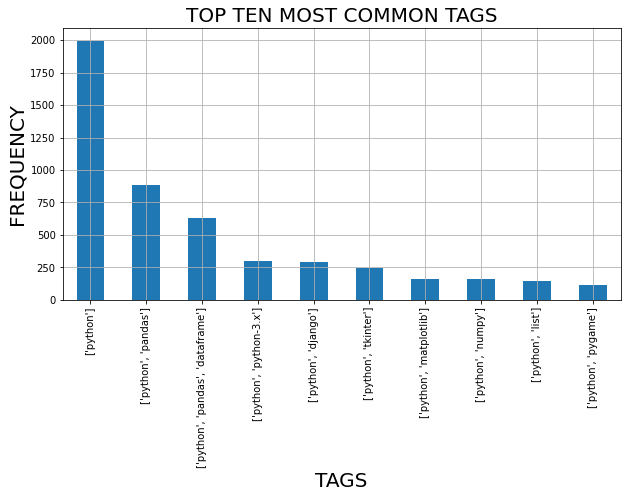

In [30]:
# Exploratory data analysis, plotting 15 most frequent tag couples.
plt.figure(figsize=(10,5))
class_distribution = tags_counts[0:10]
class_distribution.plot(kind='bar')
plt.xlabel('TAGS', fontsize=20)
plt.ylabel('FREQUENCY', fontsize=20)
plt.title('TOP TEN MOST COMMON TAGS', fontsize=20)
plt.grid()
plt.show()

### PLOTTING DISTINCT TAG COUNTS

> This part also consist of tag coluns tokenization





In [ ]:
# Assigning all tag column values
sentences_distinct_tags = df['tags'].values
print(sentences_distinct_tags)
print('='*40)
print(sentences_distinct_tags.shape)

["['python', 'pip', 'tox']" "['python', 'pip', 'easyocr']"
 "['python', 'reduce', 'numba', 'jit', 'jax']" ...
 "['python', 'web-scraping', 'hdf']"
 "['python', 'syntax', 'boolean-logic']"
 "['python', 'tensorflow', 'keras', 'tensorflow-datasets', 'recommendation-engine']"]
(32890,)


In [ ]:
# To tokenize machine-learning or deep-learning (for not to miss the '-' character)
# It is important to add 'filters =' parameter 
tokenizer = Tokenizer(num_words = 33000, oov_token="<OOV>", filters='!"#$%&()*+,./:;<=>?@[\\]^_`{|}~\t\n', split="," )
tokenizer.fit_on_texts(sentences_distinct_tags)
word_index = tokenizer.word_index

list_word_index=list(word_index)
print(list_word_index[0:10])
print('='*40)
word_count = tokenizer.word_counts
list_word_count=list(word_count)
print(list_word_count[0:10])
print('='*40)
print('The number of the distinct elements we have:', len(word_count.items()))

['<OOV>', "'python'", " 'pandas'", " 'python-3", "x'", " 'dataframe'", " 'django'", " 'machine-learning'", " 'numpy'", " 'tensorflow'"]
["'python'", " 'pip'", " 'tox'", " 'easyocr'", " 'reduce'", " 'numba'", " 'jit'", " 'jax'", " 'python-3", "x'"]
The number of the distinct elements we have: 6346


In [ ]:
# Converting Dict to List 
x = list(word_index.items())
y = list(word_count.items())

In [ ]:
# Code to sort the tuples using second element of sublist Inplace way to sort using sort()
def Sort(sub_li):
    # reverse = TRUE (Sorts in Descending order)
    # key is set to sort using second element of 
    sub_li.sort(key = lambda x: x[1], reverse=True)
    return sub_li
  
sub_li = y
#print(Sort(sub_li))

In [ ]:
df_word_count = pd.DataFrame(sub_li)
#df_word_count [0] [0]

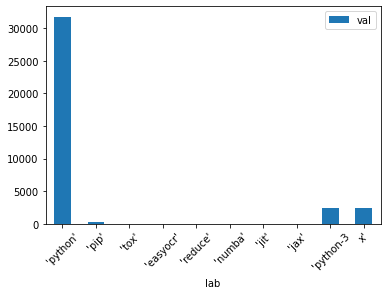

In [ ]:
df_x = pd.DataFrame({'lab':df_word_count [0:10] [0], 'val':df_word_count [0:10] [1] } )
ax = df_x.plot.bar(x='lab', y='val', rot=45)

### SCORE DISTRIBUTION by using SCORE COLUMN

In [ ]:
# DISPLAYING score column values and try to evaluate how diverse is it? 
# I mean how many different score column values exist and how then can be used for 'tag prediction' task.
output_score = df['score'].values
labels = set(output_score)
print('The different type of score values are:', labels)
print('='*150)
print('The number of different score labels are:', len(labels))
print('='*40)
print('Samples of the score:', output_score[0:10])

The different type of score values are: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 14, 18, 26, 34, 35, 43, 45, 61, -1, -7, -6, -5, -4, -3, -2}
The number of different score labels are: 26
Samples of the score: [ 0 -1  2  0  0  1 11  0  0  0]


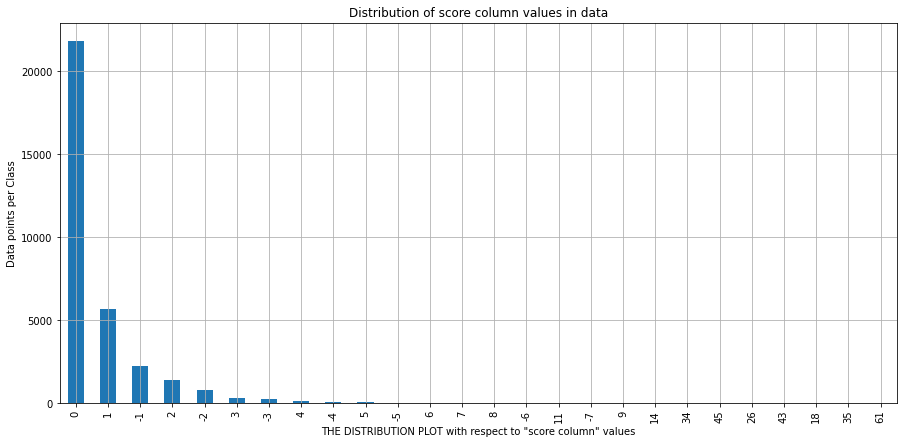

In [ ]:
# Exploratory data analysis
plt.figure(figsize=(15,7))
class_distribution = df['score'].value_counts()
class_distribution.plot(kind='bar')
plt.xlabel('THE DISTRIBUTION PLOT with respect to "score column" values')
plt.ylabel('Data points per Class')
plt.title('Distribution of score column values in data')
plt.grid()
plt.show()

## SORU SORULMA FREKANSI, AY/HAFTA/GUN/SAAT GORE

In [ ]:
df["Number_of_Questions"] = 1
df['creation_date'] = pd.to_datetime(df['creation_date'])
df = df.set_index('creation_date') 

montly_summary = df.Number_of_Questions.resample('M').sum()


In [ ]:
print('montly count report of the asked wuestions:\n', montly_summary)

montly count report of the asked wuestions:
 creation_date
2022-04-30    15874
2022-05-31    17016
Freq: M, Name: Number_of_Questions, dtype: int64


In [ ]:
weekly_summary = df.Number_of_Questions.resample('W').sum()
print('weekly count report of the asked wuestions:\n', weekly_summary)

weekly count report of the asked wuestions:
 creation_date
2022-04-03     778
2022-04-10    4514
2022-04-17    2912
2022-04-24    4135
2022-05-01    3605
2022-05-08    3364
2022-05-15    4507
2022-05-22    2994
2022-05-29    4295
2022-06-05    1786
Freq: W-SUN, Name: Number_of_Questions, dtype: int64


In [ ]:
daily_summary = df.Number_of_Questions.resample('D').sum()
print('daily count report of the asked wuestions:\n', daily_summary)

daily count report of the asked wuestions:
 creation_date
2022-04-01    163
2022-04-02    143
2022-04-03    472
2022-04-04    884
2022-04-05    967
             ... 
2022-05-27    482
2022-05-28    558
2022-05-29    604
2022-05-30    887
2022-05-31    899
Freq: D, Name: Number_of_Questions, Length: 61, dtype: int64


In [ ]:
hourly_summary = df.Number_of_Questions.resample('H').sum()
print('hourly count report of the asked wuestions:\n', hourly_summary)

hourly count report of the asked wuestions:
 creation_date
2022-04-01 00:00:00     2
2022-04-01 01:00:00     0
2022-04-01 02:00:00     2
2022-04-01 03:00:00     3
2022-04-01 04:00:00     1
                       ..
2022-05-31 19:00:00    44
2022-05-31 20:00:00    41
2022-05-31 21:00:00    28
2022-05-31 22:00:00    25
2022-05-31 23:00:00    26
Freq: H, Name: Number_of_Questions, Length: 1464, dtype: int64


## SORU SORAN YAZAR SAYISI

In [ ]:
print(df.nunique())

Unnamed: 0             25000
tags                   18669
owner                  24345
title                  31818
body                   31795
score                     26
last_activity_date     31636
question_id            31802
view_count               625
Number_of_Questions        1
dtype: int64


In [ ]:
print('The number of the authors whom asked a questions in between 01-04-2022 & 31-05-2022:\n',df['owner'].nunique())

The number of the authors whom asked a questions in between 01-04-2022 & 31-05-2022:
 24345
